<a href="https://colab.research.google.com/github/rizkynb/Tugas-Kuliah/blob/main/Tugas_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA ANALYSIS

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Pre-Processing Data

In [ ]:
# Read and create datframe from csv file
df = pd.read_csv('/content/data_tugas.csv')

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Features**
*   **customerID** : Customer ID
*   **Gender** : Whether the customer is a male or a female
*   **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
*   **Partner** : Whether the customer has a partner or not (Yes, No)
*   **Dependents** : Whether the customer has dependents or not (Yes, No)
*   **Tenure** : Number of months the customer has stayed with the company
*   **PhoneService** : Whether the customer has a phone service or not (Churn, No)
*   **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
*   **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
*   **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check the descriptive statistics of numeric variables

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Insight**:
From above, it can be concluded that:
1.   The average customers stay with the company is 32.3 months with a minimum of 0 months and a maximum of 72 months.
2.   The average customer spends per month at USD 64.7 with a minimum spend at USD 18.25 and a maximum at USD 118.75



In [ ]:
# Review if there are some null values in the dataset

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values, so we can go to the next step.

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

###Data Cleaning

Total Charges should be numerical type, so I convert it into numerical type.

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Input missing values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Changing Categorical Values, encoded into integers

for i in df.select_dtypes(include = ['object']).columns.values:
  df[i] = df[i].replace(['Yes','No'],[1,0])

In [ ]:
# Changing Categorical Values, encoded into integers

for j in df.select_dtypes(include = ['object']).columns.values:
  df[j] = df[j].replace(['Female','Male'],[0,1])

for k in df.select_dtypes(include = ['object']).columns.values:
  df[k] = df[k].replace(['No phone service','No internet service'],[2,2])


In [ ]:
for m in df.select_dtypes(include = ['object']).columns.values:
  df[m] = df[m].replace(['DSL','Fiber optic', 'Month-to-month', 'One year',
                         'Two year'],[1,2,0,1,2])

for n in df.select_dtypes(include = ['object']).columns.values:
  df[n] = df[n].replace(['Electronic check','Mailed check', 'Bank transfer (automatic)',
                        'Credit card (automatic)' ],[0,1,2,3])


In [ ]:
df.drop('customerID', axis = 1 , inplace = True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


##Exploratory Data Analysis (EDA)

Text(0.5, 1.01, 'Count of Churn Customer')

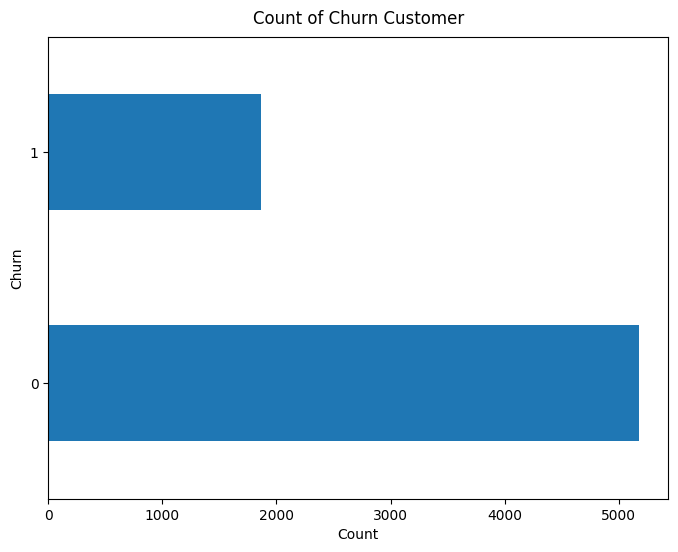

In [ ]:
# Visualize customer churn

df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))

plt.xlabel('Count')
plt.title('Count of Churn Customer', y =1.01)

In [ ]:
# Check Customers churn percentage

df['Churn'].value_counts()/len(df['Churn'])*100

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64

In [ ]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

The data above is unbalanced because the number of churn customers is much less than the number of non-churn customers.

<Axes: xlabel='OnlineSecurity', ylabel='count'>

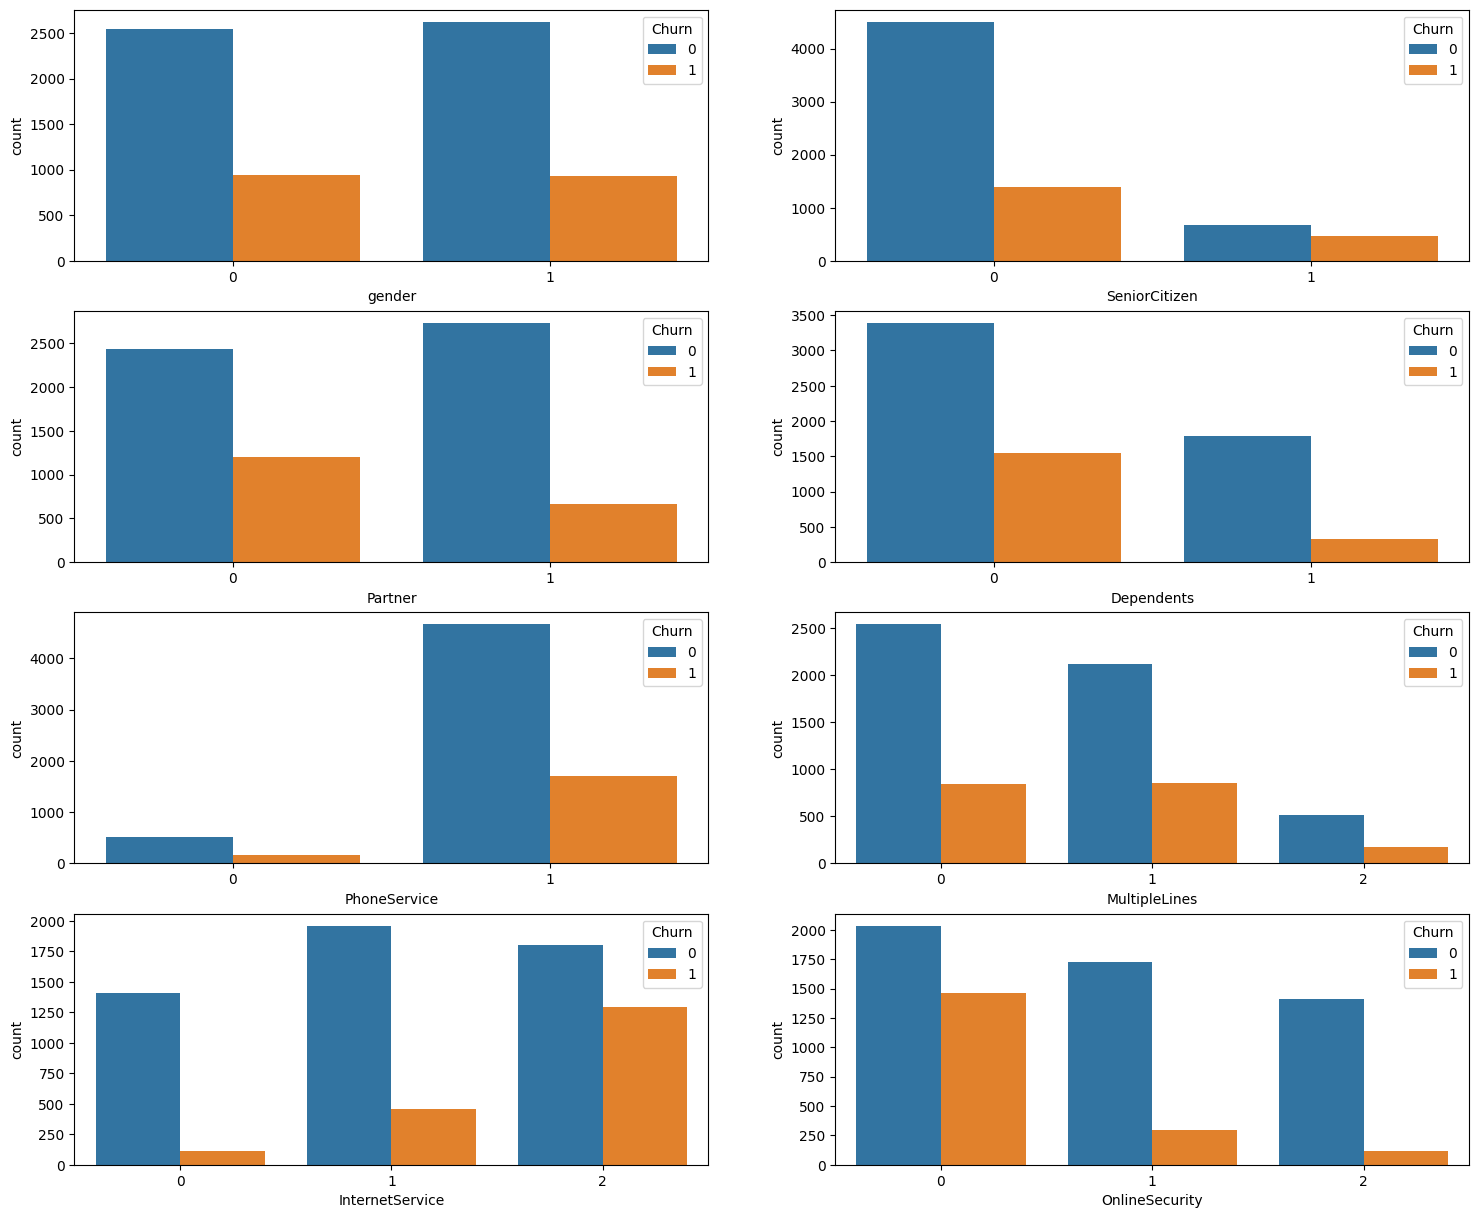

In [ ]:
# Visualize categorical variables

fig, ax = plt.subplots(4, 2, figsize = (18, 15))

sns.countplot(data = df, x = 'gender', hue = 'Churn', ax=ax[0][0])
sns.countplot(data = df, x = 'SeniorCitizen', hue = 'Churn', ax = ax[0][1])
sns.countplot(data = df, x = 'Partner', hue = 'Churn', ax = ax[1][0])
sns.countplot(data = df, x = 'Dependents', hue = 'Churn', ax = ax[1][1])
sns.countplot(data = df, x = 'PhoneService', hue = 'Churn', ax = ax[2][0])
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn', ax = ax[2][1])
sns.countplot(data = df, x = 'InternetService', hue = 'Churn', ax = ax[3][0])
sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn', ax = ax[3][1])


<Axes: xlabel='PaymentMethod', ylabel='count'>

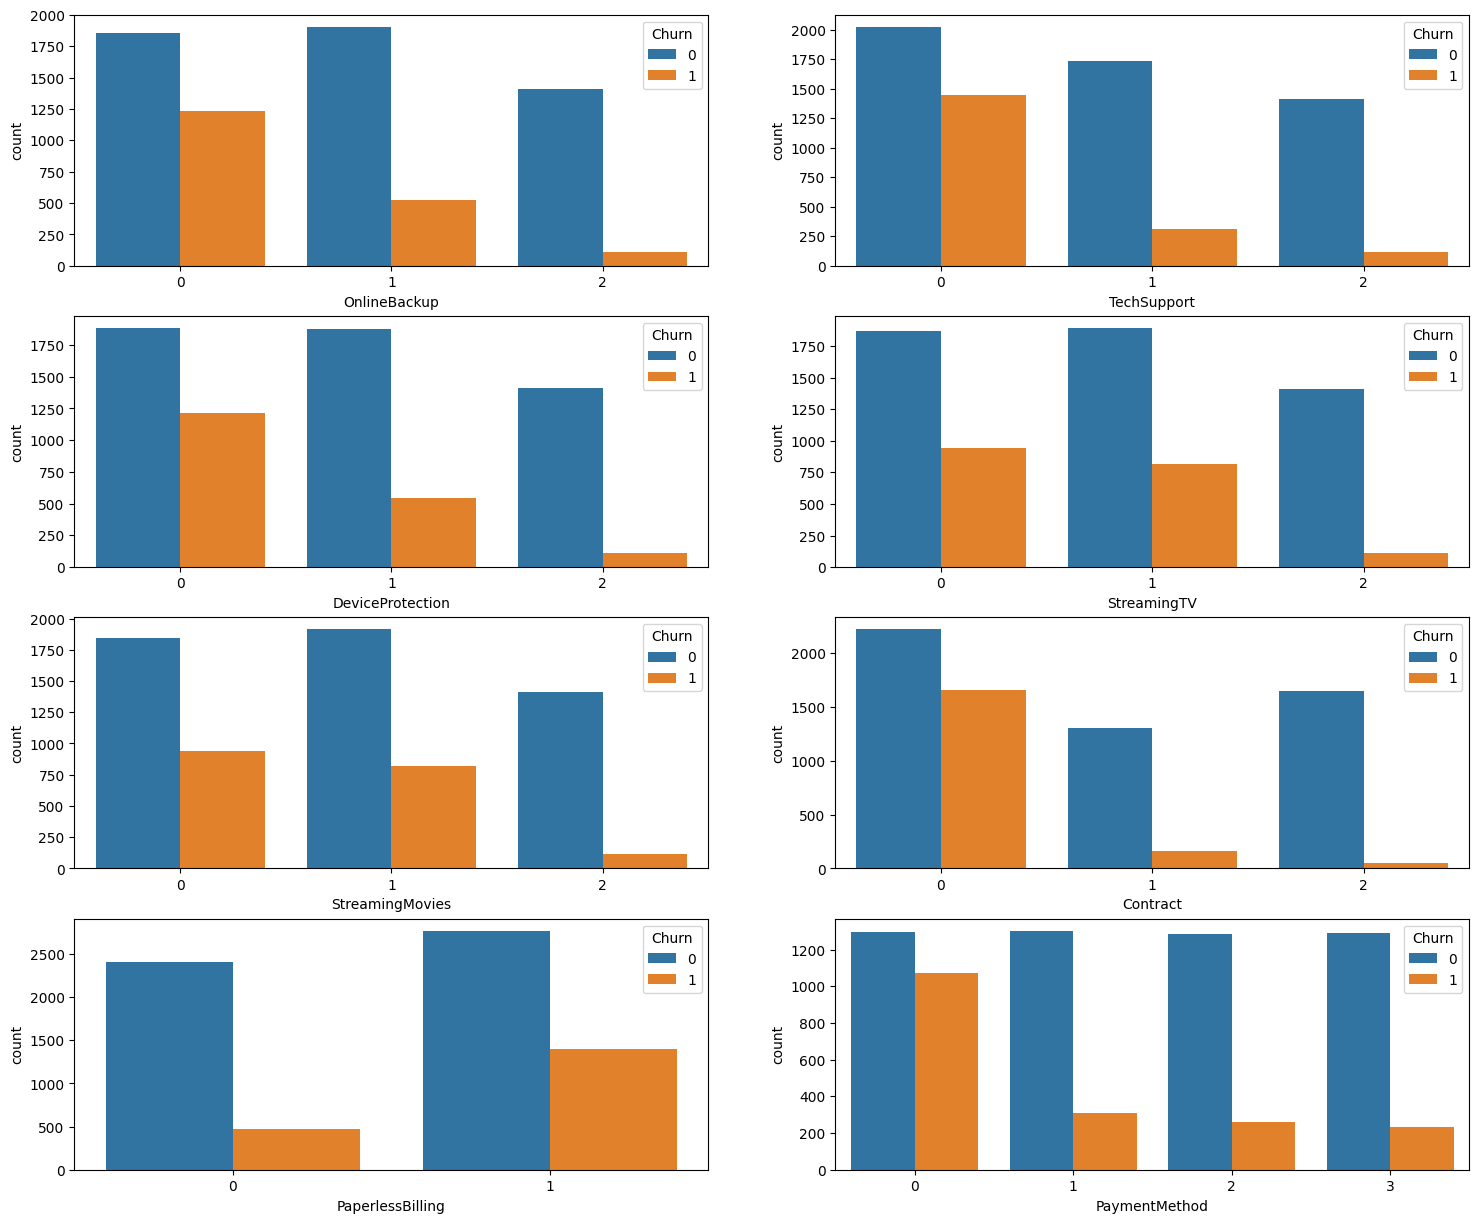

In [ ]:
# Visualize categorical variables

fig, ax = plt.subplots(4, 2, figsize = (18, 15))

sns.countplot(data = df, x = 'OnlineBackup', hue = 'Churn', ax = ax[0][0])
sns.countplot(data = df, x = 'DeviceProtection', hue = 'Churn', ax = ax[1][0])
sns.countplot(data = df, x = 'TechSupport', hue = 'Churn', ax = ax[0][1])
sns.countplot(data = df, x = 'StreamingTV', hue = 'Churn', ax = ax[1][1])
sns.countplot(data = df, x = 'StreamingMovies', hue = 'Churn', ax = ax[2][0])
sns.countplot(data = df, x = 'Contract', hue = 'Churn', ax = ax[2][1])
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn', ax = ax[3][0])
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn', ax = ax[3][1])

<ipython-input-29-581426f3de43>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly_churn = sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')],
<ipython-input-29-581426f3de43>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly_churn = sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')],


Text(0.5, 1.0, 'Monthly Charges by Churn')

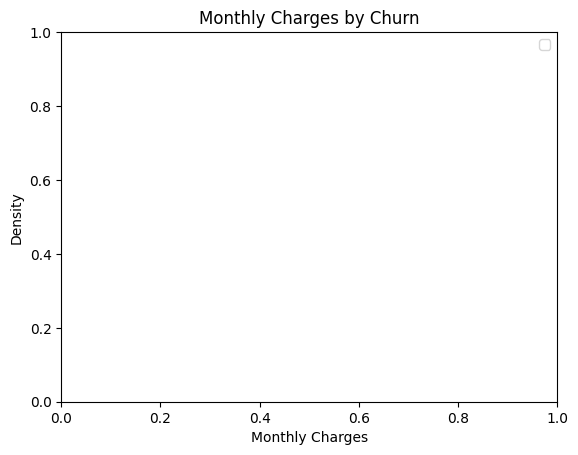

In [ ]:
# Visualize Churn by Monthly Charges

monthly_churn = sns.kdeplot(df.MonthlyCharges[(df['Churn']=='Yes')],
                            color = 'red', shade = True)
monthly_churn = sns.kdeplot(df.MonthlyCharges[(df['Churn']=='No')],
                            color = 'blue', shade = True)

monthly_churn.legend(['Churn','No Churn'], loc='upper right')
monthly_churn.set_xlabel('Monthly Charges')
monthly_churn.set_ylabel('Density')
monthly_churn.set_title('Monthly Charges by Churn')

**Insight:** From visualize data, we can seen that customer who pays monthly charges higher than average of customers' monthly charges, chance of customer churn is higher.

<ipython-input-30-2c2054a68398>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  total_churn = sns.kdeplot(df.TotalCharges[(df['Churn']=='Yes')],
<ipython-input-30-2c2054a68398>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  total_churn = sns.kdeplot(df.TotalCharges[(df['Churn']=='No')],


Text(0.5, 1.0, 'Total Charges by Churn')

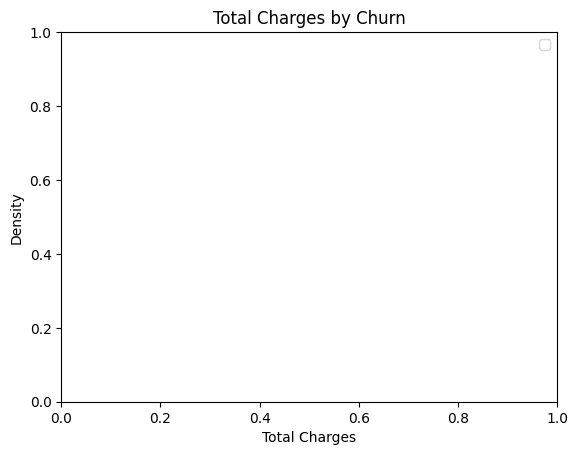

In [ ]:
# Visualize Churn by Total Charges

total_churn = sns.kdeplot(df.TotalCharges[(df['Churn']=='Yes')],
                            color = 'red', shade = True)
total_churn = sns.kdeplot(df.TotalCharges[(df['Churn']=='No')],
                            color = 'blue', shade = True)

total_churn.legend(['Churn','No Churn'], loc='upper right')
total_churn.set_xlabel('Total Charges')
total_churn.set_ylabel('Density')
total_churn.set_title('Total Charges by Churn')

<Axes: >

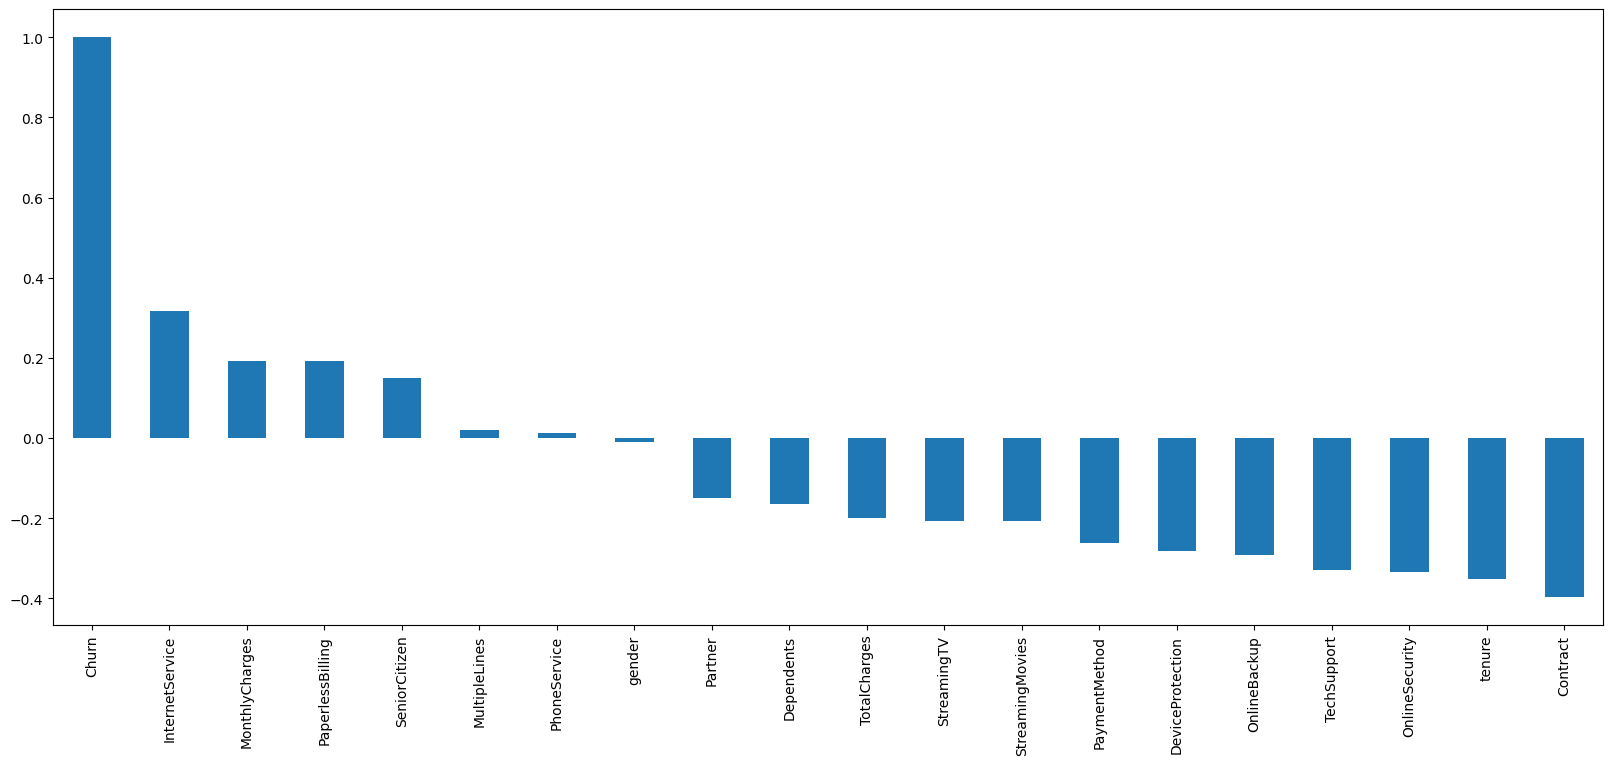

In [ ]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

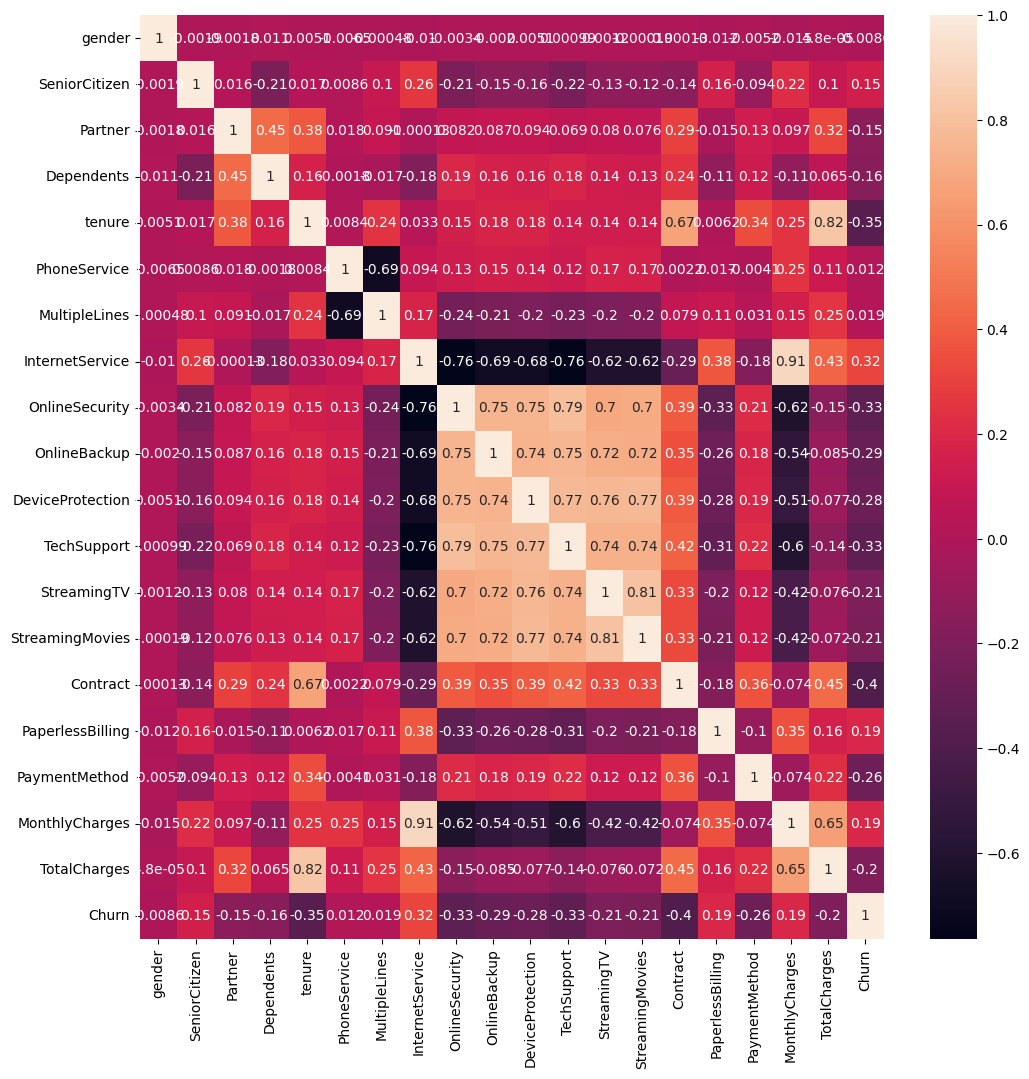

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

**Conclusions**:
1. **Gender** has no influence on customer churn
2. **Non-senior citizens** have a higher rate of churning.
3. **Internet service, Fiber Optic**, is more likely have a higher churning
4. **No Tech support** and **device protection** have a higher churning
5. **Contracts** that are renewed monthly experience more churning (Month-to-month).
6. **Payment methods** in customer churning mostly occur through electronic check

#MODELING

##Import Library

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##Reading Dataset

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [ ]:
# Define features and labels
X = df.iloc[:,:-1]
y = df['Churn']

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25)

print(f'Total train data: {len(X_train)}')
print(f'Total test data: {len(X_test)}')

Total train data: 5282
Total test data: 1761


###Decision Tree

In [ ]:
# Modeling using Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1290
           1       0.47      0.46      0.46       471

    accuracy                           0.72      1761
   macro avg       0.64      0.63      0.64      1761
weighted avg       0.71      0.72      0.72      1761



As you can see, the accuracy using the Decision Tree is quite low. This is due to the unbalanced dataset. Therefore, I do not use accuracy as a reference metrics. The metrics I will use on this dataset are recall, precision and f1 score.

<Axes: >

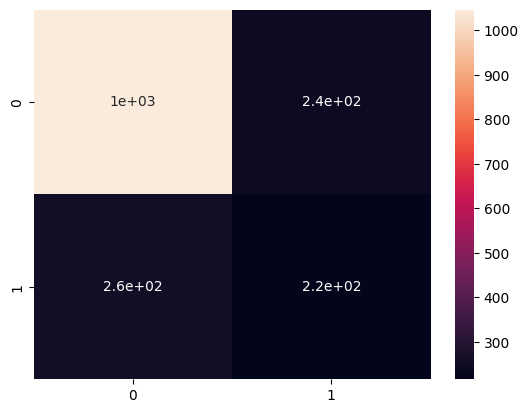

In [ ]:
# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

###Random Forest

In [ ]:
# Modeling using Decision Tree
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                                  min_samples_leaf = 8, random_state=100)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1290
           1       0.68      0.51      0.59       471

    accuracy                           0.81      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761



By using the Random Forest model, results are obtained with better precision, recall and f1 score values than using the Decision Tree model.

<Axes: >

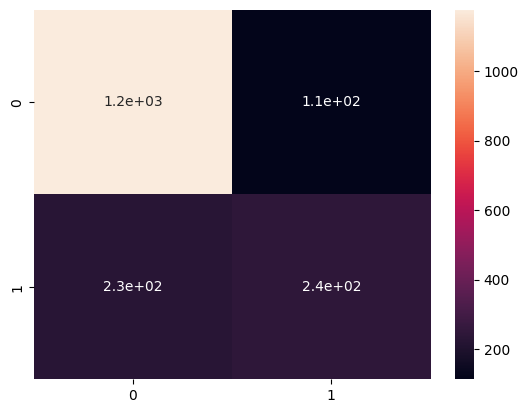

In [ ]:
# Show confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)